In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Attribute Information

#### **Input Features**
All the feature values have already been scaled to a similar range so that you won't have to apply feature scaling.

- **Lot No.:** Lot number of the motorcycle. Higher Lot number signifies newer motorcycle.

- **Engine Size:** Size of the eingine of the motorcycle.

- **Mileage:** Measure of how long the motorcycle runs for a litre of gas.

- **KM Run:** Kilometers run on the motorcycle.

- **Max Power:** Maximum power output of the motorcycle.

\

#### **Target Variable**

- **Price:** Resale value of the motorcycle in thousands. Our target variable.


In [4]:
df = pd.read_csv('https://drive.google.com/uc?id=1zeE911284qKNF1q2mgoIgOa4UXYC9N2i')
df.head()

,Lot No.,Engine Size,Mileage,KM Run,Max Power,Price
0,0.056646,-1.043517,0.797331,-0.222694,-1.863743,45.026610
1,0.238778,-0.417864,0.000508,0.866960,-0.312565,39.300833
2,-1.492397,0.936633,0.785432,-0.091035,2.423967,58.923446
3,1.132288,-0.583562,0.790543,1.262054,-1.121522,52.101286
4,1.318906,2.024895,0.996975,1.427730,4.410519,79.322492


In [6]:
df.shape

(500, 6)

In [7]:
df.describe()

,Lot No.,Engine Size,Mileage,KM Run,Max Power,Price
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.028943,-0.098844,0.011978,0.060914,0.290871,49.271645
std,1.016772,0.974530,1.037278,1.013258,1.988121,16.567155
min,-2.983970,-3.051313,-2.570978,-2.720897,-5.797945,0.000000
25%,-0.628825,-0.754901,-0.713869,-0.557405,-1.055721,38.781717
50%,0.044120,-0.145722,0.009085,0.059825,0.203102,49.871182
75%,0.741279,0.595638,0.759851,0.720886,1.687999,59.135314
max,3.625287,2.811878,3.702458,3.173982,6.536713,100.000000


In [8]:
df.corr()

,Lot No.,Engine Size,Mileage,KM Run,Max Power,Price
Lot No.,1.000000,-0.075511,-0.030721,-0.026450,-0.072469,0.394459
Engine Size,-0.075511,1.000000,-0.051029,0.043970,0.989369,0.487538
Mileage,-0.030721,-0.051029,1.000000,-0.066603,-0.045527,0.610832
KM Run,-0.026450,0.043970,-0.066603,1.000000,0.045637,-0.385401
Max Power,-0.072469,0.989369,-0.045527,0.045637,1.000000,0.485464
Price,0.394459,0.487538,0.610832,-0.385401,0.485464,1.000000


In [5]:
X = df.drop('Price', axis = 1)
y = df['Price']


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, median_absolute_error as mae

model = LinearRegression().fit(X, y)
ypred = model.predict(X)
print(mse(y, ypred), mae(y, ypred))

6.537122197504815 1.683778569107865


In [13]:
residuals = ypred - y
residuals

0      4.886867
1      3.594386
2     -2.059584
3      1.396812
4      1.858185
         ...   
495   -1.455648
496    0.211151
497   -0.678169
498    4.007883
499   -4.897724
Name: Price, Length: 500, dtype: float64

Multiple collinearity is a situation where there is a strong linear relationship between two or more predictor variables in a regression model. It occurs when two or more predictor variables are highly correlated with each other.

The significance of multiple collinearity lies in its potential to impact the performance of a regression model. It can lead to increased variance, increased standard errors, and reduced prediction accuracy. Multiple collinearity can make it challenging to estimate the coefficients accurately, interpret their significance, and make reliable predictions. It is therefore important to address multiple collinearity when building regression models to ensure their reliability and validity.

## to remove this::
There are several methods to address multiple collinearity in regression models:

Variance Inflation Factor (VIF): The VIF is a statistical measure that can be used to assess the degree of collinearity among predictor variables. Variables with a high VIF value (typically above 5) indicate high collinearity. By examining the VIF values, you can identify variables that are highly collinear and consider removing them from the model.

Principal Component Regression (PCR): PCR is a technique that reduces the dimensionality of the data by projecting it onto a lower-dimensional space while retaining the most important information. By performing PCR, you can identify the most important variables and remove the less important ones, reducing the collinearity.

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 
print(VIF)

[1.0087076423300199, 12.616827778300836, 1.0089247045274492, 1.010388194748689, 12.603910494981058]


In [17]:
#This shows that the multicolinearity is a problem and specially on the 4th indexed column

#remove 4th index column from X dataframe
X = X.drop('Max Power', axis = 1)

## check for homoscedasticity

Homoscedasticity refers to the property of a regression model where the variance of the residuals (i.e., the errors) remains constant across different levels of the dependent variable.

The significance of homoscedasticity lies in its impact on the interpretation and estimation of regression coefficients. When the residuals have homoscedasticity, it means that the variance of the errors is constant, regardless of the level of the dependent variable. This property allows for the estimation of the regression coefficients with high accuracy and provides a basis for interpreting the significance of the coefficients.

On the other hand, when the residuals exhibit heteroscedasticity (i.e., non-constant variance), it can make it challenging to estimate the regression coefficients accurately and interpret the significance of the coefficients. Heteroscedasticity can lead to issues such as biased estimates, inflated standard errors, and reduced prediction accuracy. Therefore, it is important to assess the homoscedasticity of the residuals in a regression model to ensure the validity and reliability of the results.

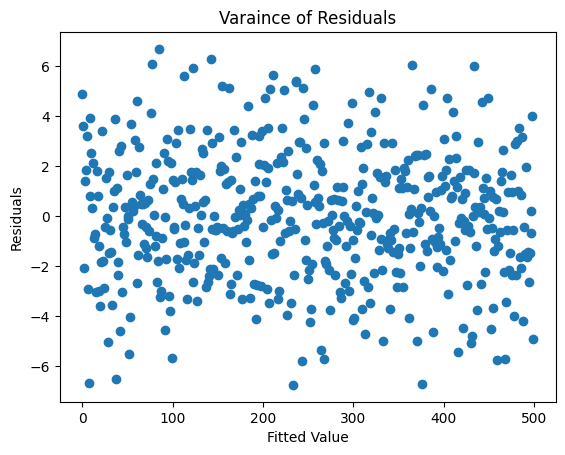

In [18]:
x_ax = range(500)

plt.scatter(x_ax, residuals)
plt.title('Varaince of Residuals')
plt.xlabel('Fitted Value')
plt.ylabel('Residuals')
plt.show()

Auto-correlation refers to the correlation between a time series variable and its lagged values. It measures the degree to which the values of a variable are related to each other at different time lags.

The significance of auto-correlation lies in its impact on the interpretation and forecasting of time series data. Auto-correlation can indicate the presence of temporal dependencies in the data, which can affect the accuracy of forecasts and the validity of statistical analyses.

When there is auto-correlation in a time series, it means that the values of the variable at different time points are correlated with each other. This can lead to issues such as biased estimates, inflated standard errors, and reduced prediction accuracy.

Auto-correlation can be addressed using techniques such as differencing, detrending, or using time-series models that account for auto-correlation, such as ARIMA models. It is important to assess and handle auto-correlation in time series data to ensure the validity and reliability of the results.

In [19]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson_score = durbin_watson(residuals)
print(durbin_watson_score)

2.071640641906667


Let's say it has no autocorrelation too

### check for normality of residuals

In [20]:
from statsmodels.stats.diagnostic import normal_ad
p_value = normal_ad(residuals)

print(p_value)

(0.21145380204490039, 0.8567340130009202)


A p-value of (0.211, 0.856) for the normality test of residuals indicates that the null hypothesis of normality is not rejected.

In the context of the normality test of residuals, the null hypothesis is that the residuals follow a normal distribution. The p-value is a measure of the probability of observing the test statistic (e.g., the sample mean or sample standard deviation) or a more extreme value, given that the null hypothesis is true.

p-value of (0.211, 0.856) for the normality test of residuals suggests that the data are not significantly non-normal, and the null hypothesis of normality can be rejected at the 5% significance level.

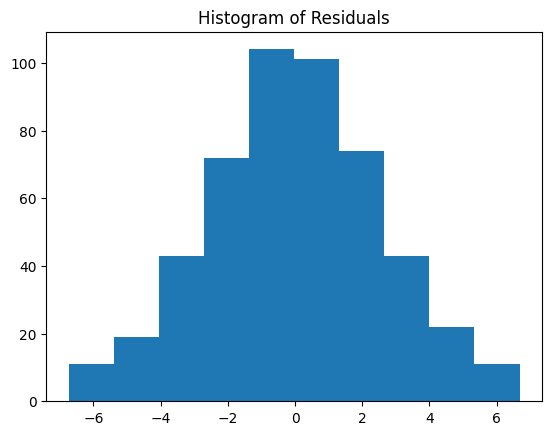

In [23]:
plt.hist(residuals)
plt.title('Histogram of Residuals')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 23)

The sklearn library has a number of functions to calculate different performance metrics but it misses out on the adjusted $R^2$ score. So in this section you will implement the function `adjusted_r2_score` that computes adjusted $R^2$ score for a model.

Recall: $$\text{Adjusted}\ {R^2} = 1- (1-R^2)\frac{n-1}{n-d-1}$$


In [26]:
from sklearn.metrics import r2_score
def ad_r2_sq(y_test, y_pred):
    n = X.shape[0]
    d = X.shape[1] #features

    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - d - 1)
    return adj_r2

In [30]:
# create a feature combination list 
import itertools

In [37]:
features_combinations = []
for L in range(1, X.shape[1]+1):
    for subset in itertools.combinations(range(X.shape[1]), L):
        features_combinations.append(list(subset))

models = dict() # dictionary to store the parameters of different models
models_r2 = dict() # dictionary to store the different model's adjusted r2 score 

#print different linear regression models with different feature combinations with their r2 score
for i in range(len(features_combinations)):
    features = features_combinations[i]
    X_train_subset = X_train.iloc[:, features]
    X_test_subset = X_test.iloc[:, features]
    model = LinearRegression().fit(X_train_subset, y_train)
    y_pred = model.predict(X_test_subset)
    r2 = ad_r2_sq(y_test, y_pred)
    models[i] = model
    models_r2[i] = r2


for key in models_r2.keys():
  print("{}: {}".format(features_combinations[key], models_r2[key]))
best = max(models_r2, key=models_r2.get)
print("Best model: {} Parameters: {}".format(features_combinations[best], models[best])) 

[0]: 0.11375323819827887
[1]: 0.1287185602790859
[2]: 0.46142126385466864
[3]: 0.12732770614173528
[0, 1]: 0.3769606413860662
[0, 2]: 0.6086600360269299
[0, 3]: 0.28738643746447956
[1, 2]: 0.6481791941679056
[1, 3]: 0.33400341664324396
[2, 3]: 0.5907432690356553
[0, 1, 2]: 0.8647171659363114
[0, 1, 3]: 0.5619233067704257
[0, 2, 3]: 0.7187491723317064
[1, 2, 3]: 0.782523870530624
[0, 1, 2, 3]: 0.978326410618736
Best model: [0, 1, 2, 3] Parameters: LinearRegression()


## Ridge regression - L2 regularization
Ridge regression is a regularization technique used in linear regression to address issues such as multicollinearity and overfitting. It adds a penalty term to the objective function of the linear regression model, which controls the magnitude of the coefficients.

The basic idea behind ridge regression is to shrink the coefficients towards zero, but not all the way to zero. This is achieved by adding a term to the loss function, which is proportional to the square of the coefficients. The penalty term is controlled by a hyperparameter called the regularization strength, typically denoted as λ.

The ridge regression model is formulated by minimizing the following objective function:


minimize ∑(y - Xβ)² + λ∑β²
where:

y is the vector of response variables

X is the design matrix

β is the vector of coefficients

λ is the regularization strength

By increasing the value of λ, the coefficients are shrunk towards zero, with larger values of λ resulting in stronger shrinkage. This helps to mitigate issues such as multicollinearity by reducing the impact of highly correlated predictor variables

In [38]:
from sklearn.linear_model import Ridge

ridge_regression = Ridge()
ridge_regression.fit(X_train, y_train)
y_pred = ridge_regression.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f'Ridge score: {r2}')
print(f"Params: Coeff: {ridge_regression.coef_},\n Intercept: {ridge_regression.intercept_}")

Ridge score: 0.9785330550038656
Params: Coeff: [ 7.15622007  9.75549978 10.00850797 -5.90971934],
 Intercept: 50.34152306212406


### Lasso regression l1 regularization
Lasso Regression: It is a linear regression model that uses the L1 regularization term to reduce the magnitude of coefficients. This is done by adding the absolute value of the coefficients to the cost function. The effect of this is that it shrinks the coefficients towards zero, which can be useful when there are correlated features. In addition, Lasso Regression has the property of producing sparse solutions, meaning that some of the coefficients can become exactly zero. This can be useful for feature selection.


Ridge Regression: It is a linear regression model that uses the L2 regularization term to reduce the magnitude of coefficients. This is done by adding the square of the coefficients to the cost function. The effect of this is that it shrinks the coefficients towards zero, which can be useful when there are correlated features.


In summary, Lasso Regression tends to produce sparse solutions, meaning that some of the coefficients can become exactly zero, which can be useful for feature selection. On the other hand, Ridge Regression tends to produce smoother solutions, meaning that the coefficients are shrunk towards zero but not necessarily zero.

In [39]:
from sklearn.linear_model import Lasso
lasso_regression = Lasso()
lasso_regression.fit(X_train, y_train)
y_pred = lasso_regression.predict(X_test)
l2 = r2_score(y_test, y_pred)

print('R2 score for Lasso: ', l2)
print(f"params: Coeff: {lasso_regression.coef_},\n Intercept: {lasso_regression.intercept_}")

R2 score for Lasso:  0.9638986170621812
params: Coeff: [ 6.15116121  8.59809087  8.99534656 -4.96140851],
 Intercept: 50.32844026944815
